<a href="https://colab.research.google.com/github/yoon-303/LipService/blob/main/train_lip_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras import models, layers, activations
from keras.layers import Conv2D, TimeDistributed, BatchNormalization, MaxPooling2D, Flatten, Bidirectional, Dense,Dropout,Flatten

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
x_data = np.load('/content/gdrive/My Drive/jolp/lip/lip_x_data.npy') # x_save.npy
y_data = np.load('/content/gdrive/My Drive/jolp/lip/lip_y_data.npy') # y_data.npy



y_data = keras.utils.to_categorical(y_data, num_classes=None)
#X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, stratify=y_data)
print(x_data.shape, y_data.shape)

(3000, 27, 64, 64, 3) (3000, 11)


In [4]:
# Train과 Test 분리
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, stratify=y_data)\
#X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = False)
print("x_train: {}, X_test: {}".format(X_train.shape, X_test.shape))
print("Y_train: {}, Y_test: {}".format(Y_train.shape, Y_test.shape))

x_train: (2400, 27, 64, 64, 3), X_test: (600, 27, 64, 64, 3)
Y_train: (2400, 11), Y_test: (600, 11)


In [5]:


class CNN_LSTM(keras.Model):
    def __init__(self, num_classes):
        super(CNN_LSTM, self).__init__()
       
        self.conv1 =TimeDistributed(Conv2D(64, kernel_size=(5, 5),  activation='relu'))
        self.conv2 = TimeDistributed(Conv2D(32, kernel_size=(5, 5),  activation='relu'))
        self.conv3 = TimeDistributed(Conv2D(64, kernel_size=(5, 5), activation='relu'))
        self.Max = TimeDistributed(MaxPooling2D(pool_size= (2,2)))
        self.Max2 = TimeDistributed(MaxPooling2D(pool_size= (2,2)))
        self.lstm = layers.LSTM(256, return_sequences=False)
        self.flat = TimeDistributed(Flatten())
        self.dense = layers.Dense(11, activation='softmax')
        
    def call(self,x ):
        x = self.conv1(x) #(32, 20, 60, 60, 32)
        x = self.Max(x)
        x = self.conv2(x) #(32, 20, 56, 56, 64)
        x = self.Max2(x)
        x = self.conv3(x)
        x = self.flat(x)
        x = self.lstm(x)
        x = self.dense(x)
        return x

In [6]:

def get_model():
    return CNN_LSTM(num_classes =11)

In [7]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [8]:
model = get_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
es = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(X_train, Y_train, batch_size= 32, epochs= 100, verbose = 1, validation_data = (X_test, Y_test), callbacks=[es])
#model.summary()


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/100
75/75 [==============================] - 28s 160ms/step - loss: 2.3414 - accuracy: 0.1056 - val_loss: 2.2711 - val_accuracy: 0.1283
Epoch 2/100
75/75 [==============================] - 11s 142ms/step - loss: 2.2507 - accuracy: 0.1511 - val_loss: 2.2589 - val_accuracy: 0.1433
Epoch 3/100
75/75 [==============================] - 11s 142ms/step - loss: 2.2411 - accuracy: 0.1685 - val_loss: 2.2402 - val_accuracy: 0.1617
Epoch 4/100
75/75 [==============================] - 11s 142ms/step - loss: 2.2317 - accuracy: 0.1480 - val_loss: 2.2422 - val_accuracy: 0.1400
Epoch 5/100
75/75 [==============================] - 11s 142ms/step - loss: 2.2036 - accuracy: 0.1830 - val_loss: 2.2475 - val_accuracy: 0.1567
Epoch 6/100
75/75 [==============================] - 11s 142ms/step - loss: 2.2059 - accuracy: 0.1827 - val_loss: 2.2221 - val_accuracy: 0.1850
Epoch 7/100
75/75 [==============================] - 11s 142ms/step - loss: 2.1632 - accuracy: 0.2089 - val_loss: 2.2362 - val_accuracy:

In [9]:

history.history

{'accuracy': [0.12208333611488342,
  0.14791665971279144,
  0.16124999523162842,
  0.15791666507720947,
  0.1783333271741867,
  0.1820833384990692,
  0.20874999463558197,
  0.22458332777023315,
  0.24541667103767395,
  0.29374998807907104,
  0.3241666555404663,
  0.3683333396911621,
  0.39625000953674316,
  0.42500001192092896,
  0.4741666615009308,
  0.5145833492279053,
  0.5562499761581421,
  0.6212499737739563,
  0.6641666889190674,
  0.6929166913032532,
  0.7304166555404663,
  0.7799999713897705,
  0.8162500262260437,
  0.8129166960716248,
  0.8858333230018616,
  0.89041668176651,
  0.9191666841506958,
  0.9474999904632568,
  0.9574999809265137],
 'loss': [2.311356782913208,
  2.253497362136841,
  2.2280709743499756,
  2.2213902473449707,
  2.2050282955169678,
  2.1948087215423584,
  2.1455109119415283,
  2.0930848121643066,
  2.0503311157226562,
  1.9138246774673462,
  1.8071211576461792,
  1.6903702020645142,
  1.6139276027679443,
  1.542405128479004,
  1.422471046447754,
  1.321

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


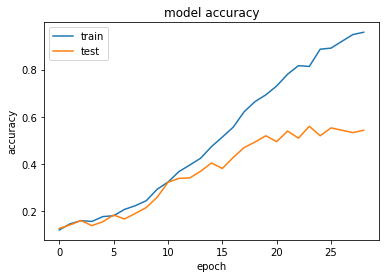

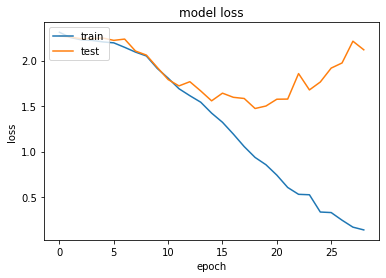

In [10]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
tf.keras.models.save_model('/models/cvcvclstm.h5')

TypeError: ignored

In [21]:
tf.keras.models.save_model(
    models,
    '/content/gdrive/My Drive/models',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

AttributeError: ignored